# Stock Close Price Comparison

Comparing the percentage change of the daily stock close price of Apple, Google, Microsoft, and Netflix between February to May 2023.

In [64]:
#importing python packages
import pandas as pd 
import matplotlib.pyplot as plt

In [65]:
#importing data
df = pd.read_csv('/kaggle/input/stock-price-action-data-set/stocks.csv', parse_dates = ['Date'], index_col = 'Date')

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 248 entries, 2023-02-07 to 2023-05-05
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Ticker     248 non-null    object 
 1   Open       248 non-null    float64
 2   High       248 non-null    float64
 3   Low        248 non-null    float64
 4   Close      248 non-null    float64
 5   Adj Close  248 non-null    float64
 6   Volume     248 non-null    float64
dtypes: float64(6), object(1)
memory usage: 15.5+ KB


In [67]:
df['Ticker'].unique()

array(['AAPL', 'MSFT', 'NFLX', 'GOOG'], dtype=object)

In [68]:
#Date Range Minimum
df.index.min()

Timestamp('2023-02-07 00:00:00')

In [69]:
#Date Range Maximum
df.index.max()

Timestamp('2023-05-05 00:00:00')

In [70]:
# AAPL close price ranges
df[df['Ticker']== 'AAPL'].agg(['min','max'])

,Ticker,Open,High,Low,Close,Adj Close,Volume
min,AAPL,144.38,146.71,143.90,145.31,145.31,41516200.0
max,AAPL,170.98,174.30,170.76,173.57,173.57,113316400.0


In [71]:
# MSFT close price ranges
df[df['Ticker']== 'MSFT'].agg(['min','max'])

,Ticker,Open,High,Low,Close,Adj Close,Volume
min,MSFT,246.55,250.93,245.61,246.27,246.27,17150300.0
max,MSFT,307.76,311.97,305.15,310.65,310.65,69527400.0


In [72]:
# NFLX close price ranges
df[df['Ticker']== 'NFLX'].agg(['min','max'])

,Ticker,Open,High,Low,Close,Adj Close,Volume
min,NFLX,287.34,297.45,285.33,292.76,292.76,2657900.0
max,NFLX,372.41,373.83,361.74,366.83,366.83,22128300.0


In [73]:
# GOOG close price ranges
df[df['Ticker']== 'GOOG'].agg(['min','max'])

,Ticker,Open,High,Low,Close,Adj Close,Volume
min,GOOG,89.54,90.13,88.86,89.35,89.35,16732000.0
max,GOOG,107.80,109.63,107.59,109.46,109.46,97798600.0


In [74]:
#Subsetting dataframes
AAPL = df[df['Ticker']== 'AAPL']
GOOG = df[df['Ticker']== 'GOOG']
NFLX = df[df['Ticker']== 'NFLX']
MSFT = df[df['Ticker']== 'MSFT']

In [75]:
#Deleting Ticker column from new dataframes 
del AAPL['Ticker']
del GOOG['Ticker']
del NFLX['Ticker']
del MSFT['Ticker']

In [76]:
#Setting day frequency
AAPL = AAPL.resample('D').asfreq()
GOOG = GOOG.resample('D').asfreq()
NFLX = NFLX.resample('D').asfreq()
MSFT = MSFT.resample('D').asfreq()

In [77]:
#Adding 'Close_Pct_Change' to each dataframe
AAPL['Close_Pct_Change'] = AAPL['Close'].pct_change().fillna(0)
GOOG['Close_Pct_Change'] = GOOG['Close'].pct_change().fillna(0)
NFLX['Close_Pct_Change'] = NFLX['Close'].pct_change().fillna(0)
MSFT['Close_Pct_Change'] = MSFT['Close'].pct_change().fillna(0)

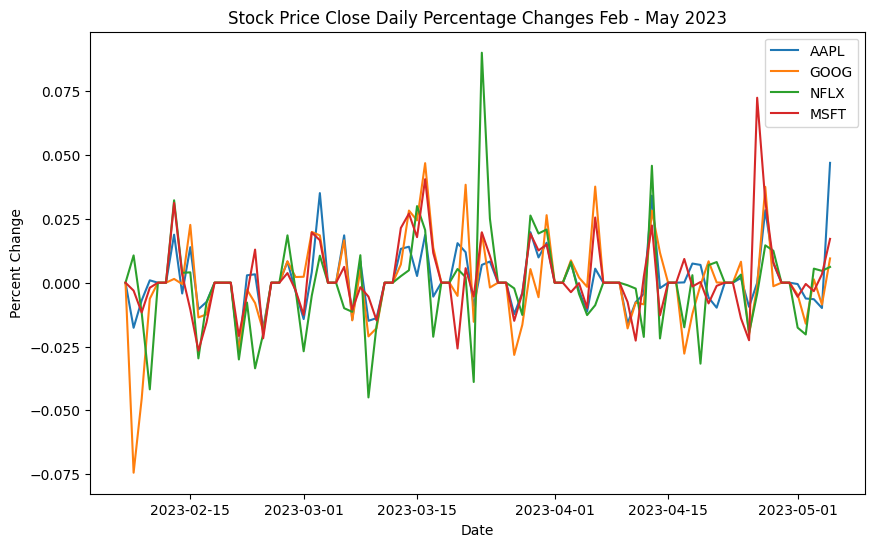

In [79]:
# Setting figure size
plt.figure(figsize = (10,6))

# Plotting Pct Change
plt.plot(AAPL['Close_Pct_Change'],label = 'AAPL')
plt.plot(GOOG['Close_Pct_Change'],label = 'GOOG')
plt.plot(NFLX['Close_Pct_Change'],label = 'NFLX')
plt.plot(MSFT['Close_Pct_Change'],label = 'MSFT')

# Labeling
plt.xlabel('Date')
plt.ylabel('Percent Change')
plt.title('Stock Price Close Daily Percentage Changes Feb - May 2023')
plt.legend()

# Displaying visualization
plt.show()

There is a correlation between the trend in positive and negative percentage close percenatge changes. This is most likely attributed to the companies being in the same sector of the stock market.